# Cargar Librerias

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 50)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [2]:
# Leer dataset
path= r'C:\Users\Dell User\Documents\Diplomado Ciencia de Datos - FES Acatlán\Módulo II - Modelado Supervisado\Material\Prácticas\Practica1\churn.csv'
data= pd.read_csv(path)
print(data.shape)
data.head(3)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
# Generamos una copia del dataset para estudiar cada caso: Regresión Lineal y Regresión Logística
linear= data
logistic= data.copy(deep= False)

In [4]:
print(linear.shape)
linear.head(1)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [5]:
print(logistic.shape)
logistic.head(1)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# LOGISTIC REGRESSION

In [6]:
logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Análisis Exploratorio

In [7]:
# Convertimos los headers de las columnas a minúsculas
logistic.columns = [x.lower() for x in logistic.columns]

In [8]:
# Desplegamos 1ros 2 registros
logistic.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
# Vemos la distribución de nuestra variable objetivo 'churn'
logistic['churn'].value_counts(1) # Vemos que la distribución está más cargada a: 'No'. Con esto vemos que las clases están 'desbalanceadas'.

No    0.73
Yes   0.27
Name: churn, dtype: float64

<AxesSubplot:>

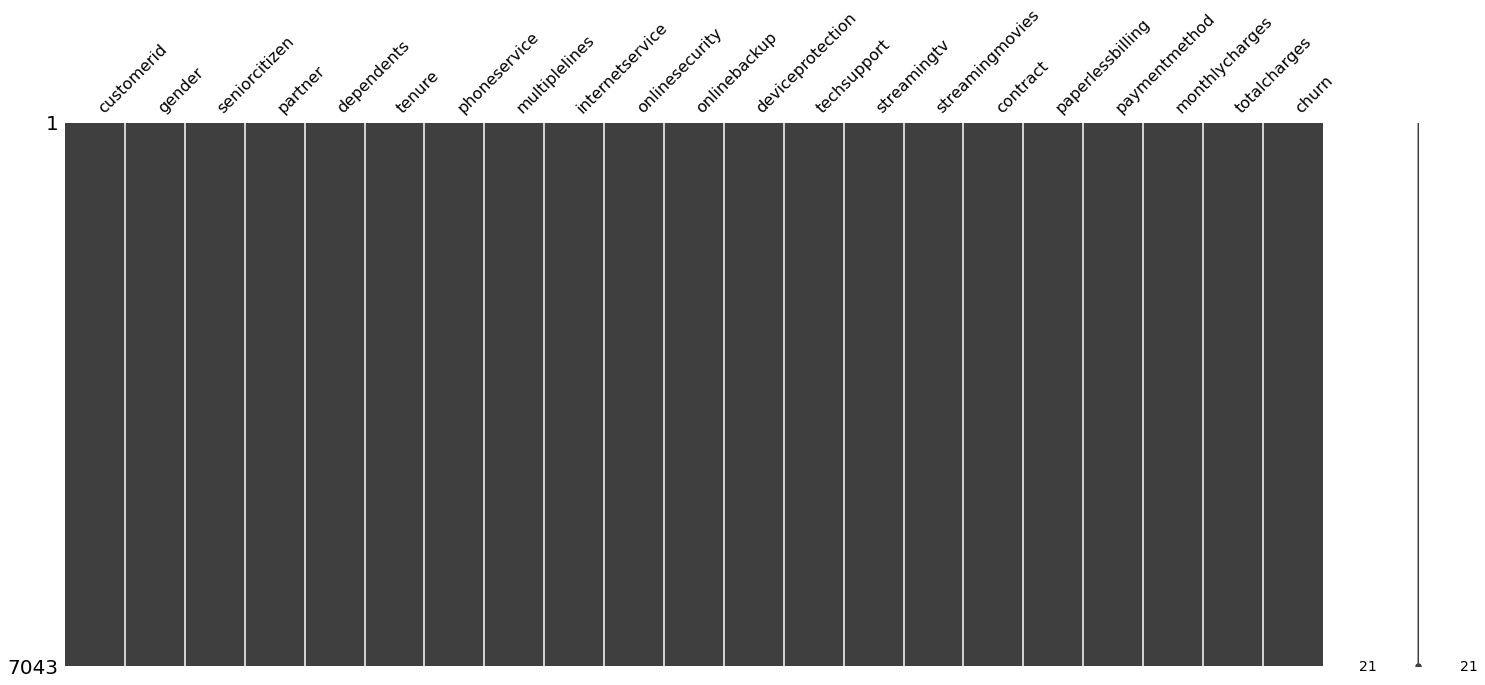

In [10]:
# Visualizamos valores faltantes
msno.matrix(logistic)

In [11]:
# Verificamos nuevamente la presencia de valores nulos
logistic.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
# Visualizamos algunos estadísticos de las variables continuas
logistic.describe(percentiles = [0.1, 0.5, 0.95, 0.99])

,seniorcitizen,tenure,monthlycharges
count,"7,043.00","7,043.00","7,043.00"
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
10%,0.00,2.00,20.05
50%,0.00,29.00,70.35
95%,1.00,72.00,107.40
99%,1.00,72.00,114.73
max,1.00,72.00,118.75


In [13]:
# Dado que 'totalcharges' no es mostrado antes, analizamos su comportamiento
logistic['totalcharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: totalcharges, dtype: object

In [14]:
# Reemplazamos valores nulos y convertimos 'totalcharges' a numérica para aplicar 'describe'
logistic['totalcharges'] = logistic['totalcharges'].replace(' ', np.nan)
logistic['totalcharges'] = pd.to_numeric(logistic['totalcharges'])

In [15]:
# Verificamos los cambios aplicados a 'totalcharges'
logistic['totalcharges'].describe()

count   7,032.00
mean    2,283.30
std     2,266.77
min        18.80
25%       401.45
50%     1,397.47
75%     3,794.74
max     8,684.80
Name: totalcharges, dtype: float64

# Etiquetado de Variables

In [16]:
# Etiquetamos las columnas del dataset de acuerdo al tipo de variable
v_disc= ['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity',
         'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies',
        'contract','paperlessbilling','paymentmethod','seniorcitizen','churn']
v_cont= ['tenure','monthlycharges','totalcharges']
#target= 'churn'

In [17]:
# Obtenemos y mostramos la proporción de las variables categóricas
for col in v_disc:
    display(logistic[col].value_counts(True).reset_index())

,index,gender
0,Male,0.50
1,Female,0.50


,index,partner
0,No,0.52
1,Yes,0.48


,index,dependents
0,No,0.70
1,Yes,0.30


,index,phoneservice
0,Yes,0.90
1,No,0.10


,index,multiplelines
0,No,0.48
1,Yes,0.42
2,No phone service,0.10


,index,internetservice
0,Fiber optic,0.44
1,DSL,0.34
2,No,0.22


,index,onlinesecurity
0,No,0.50
1,Yes,0.29
2,No internet service,0.22


,index,onlinebackup
0,No,0.44
1,Yes,0.34
2,No internet service,0.22


,index,deviceprotection
0,No,0.44
1,Yes,0.34
2,No internet service,0.22


,index,techsupport
0,No,0.49
1,Yes,0.29
2,No internet service,0.22


,index,streamingtv
0,No,0.40
1,Yes,0.38
2,No internet service,0.22


,index,streamingmovies
0,No,0.40
1,Yes,0.39
2,No internet service,0.22


,index,contract
0,Month-to-month,0.55
1,Two year,0.24
2,One year,0.21


,index,paperlessbilling
0,Yes,0.59
1,No,0.41


,index,paymentmethod
0,Electronic check,0.34
1,Mailed check,0.23
2,Bank transfer (automatic),0.22
3,Credit card (automatic),0.22


,index,seniorcitizen
0,0,0.84
1,1,0.16


,index,churn
0,No,0.73
1,Yes,0.27


# Explorar Variable Objetivo y Predictores

### Target VS Variables Continuas

In [18]:
# statistics tools
from statsmodels.graphics.mosaicplot import mosaic

In [19]:
# Creamos 3 nuevas variables para las 'v_con' del dataset
    # Utilizamos quantiles
logistic['bin_tenure']= pd.qcut(logistic['tenure'], q=10, precision=1)
logistic['bin_monthlycharges']= pd.qcut(logistic['monthlycharges'], q=10, precision=1)
logistic['bin_totalcharges'] = pd.qcut(logistic['totalcharges'], q=10, precision=1)

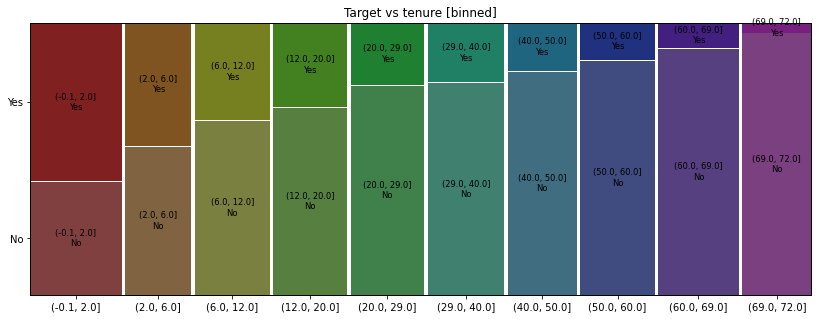

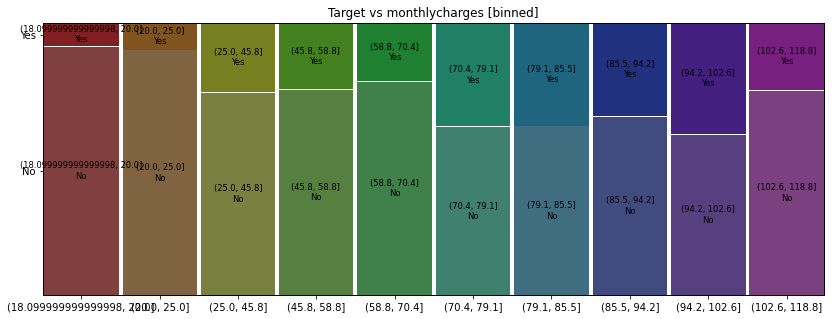

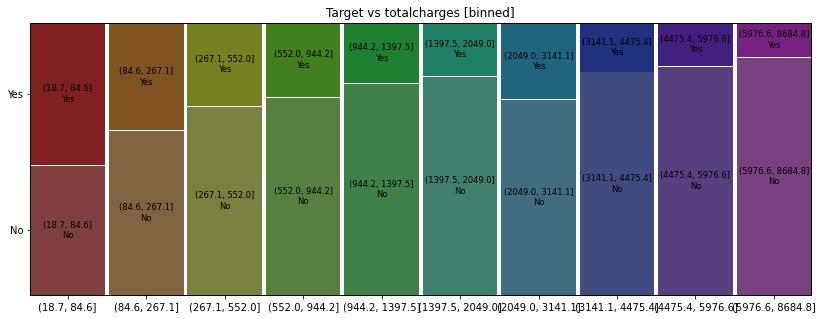

In [20]:
# Graficamos Target VS Continuas
import matplotlib as mpl

target = 'churn'
mpl.rcParams['text.color'] = 'black'
plot_cont = plt.rcParams['figure.figsize']

for f in v_cont:
    f_bin = 'bin_' + f
    plt.rcParams['figure.figsize'] = (14,5) # 
    mosaic(logistic, [f_bin, target], title='Target vs ' + f + ' [binned]')
    plt.show()
    
plt.rcParams['figure.figsize'] = plot_cont

#### Interpretación de Resultados - Continuas

* La probabilidad de 'Churn' disminuye a medida que se incrementa 'tenure', sin embargo, en el caso de 'monthlycharges' se incrementa.

### Target VS Variables Categoricas

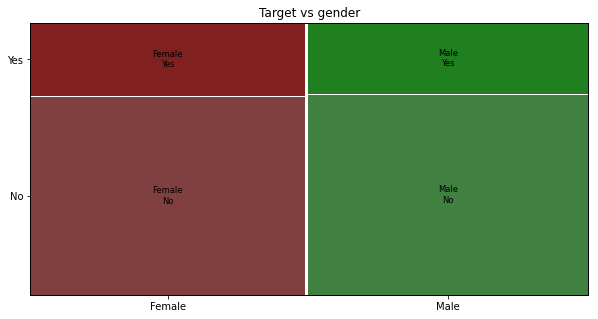

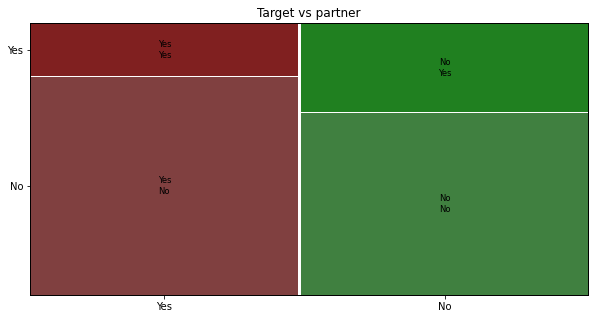

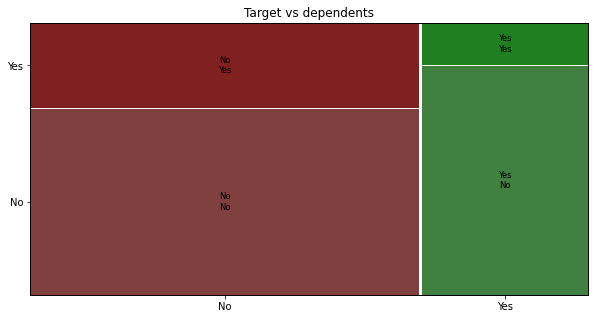

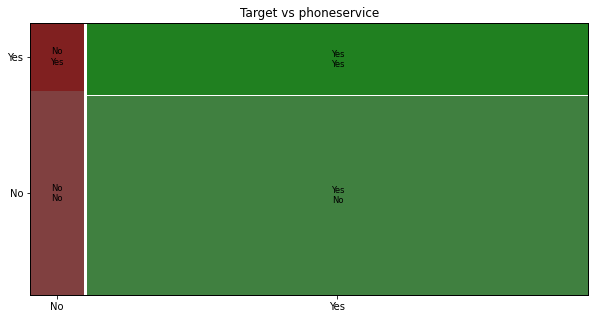

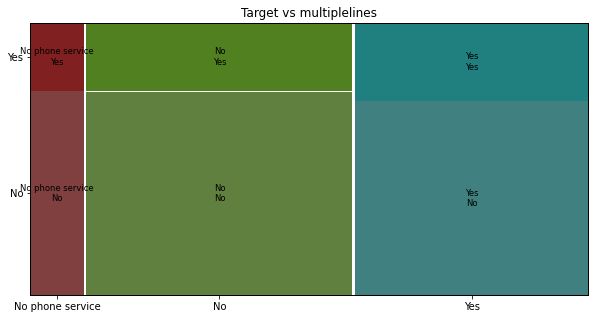

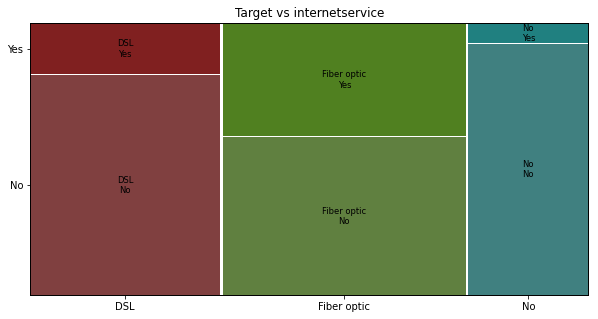

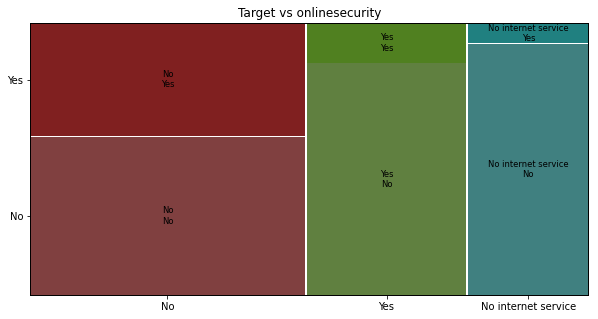

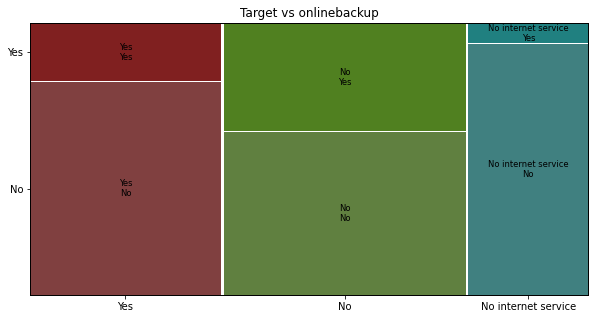

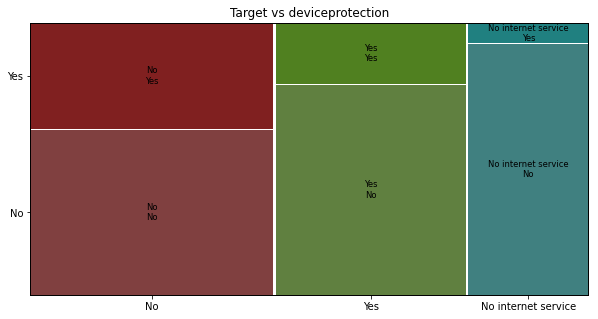

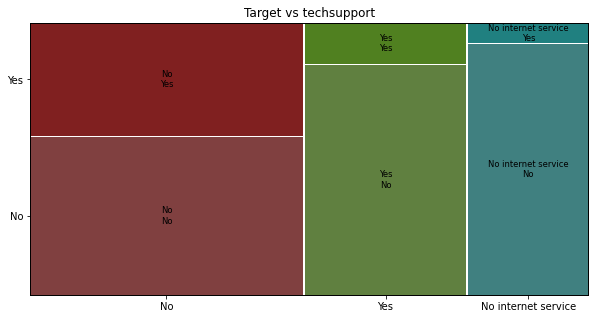

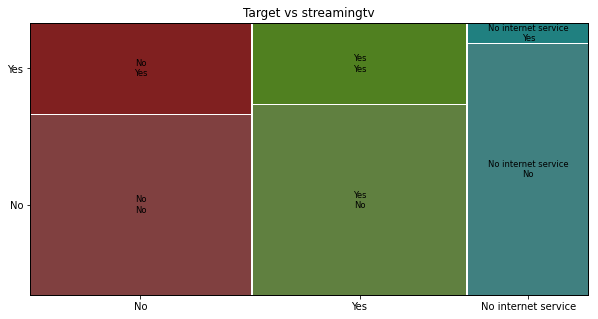

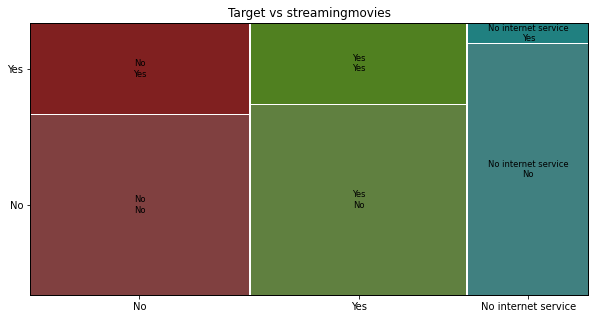

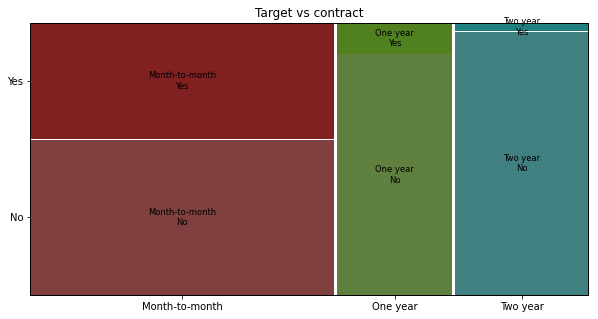

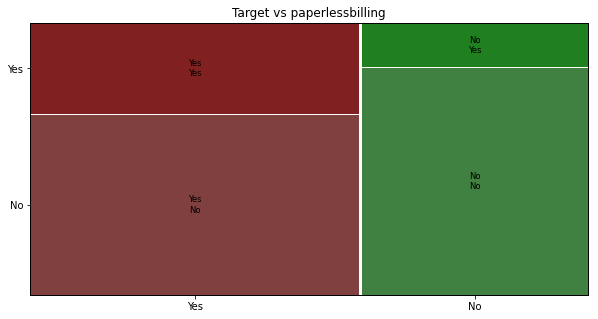

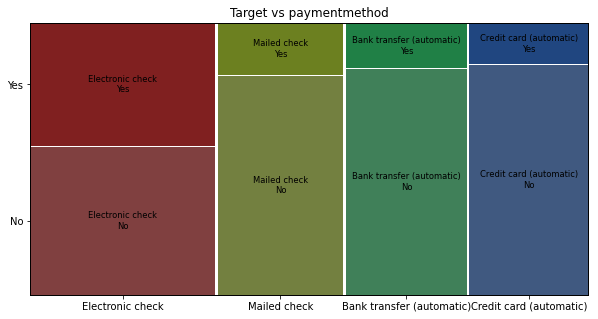

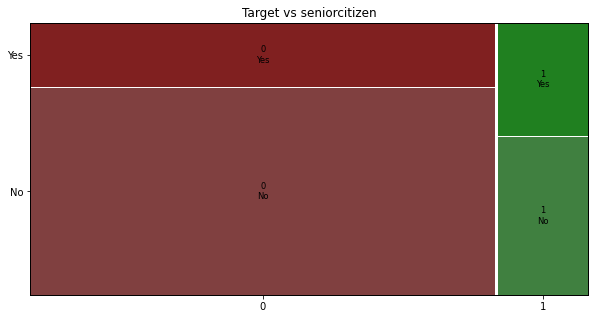

In [21]:
v_disc= ['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity',
         'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies',
        'contract','paperlessbilling','paymentmethod','seniorcitizen']
plot_var = plt.rcParams['figure.figsize']
mpl.rcParams['text.color'] = 'black'

for f in v_disc:
    plt.rcParams['figure.figsize'] = (10,5) 
    mosaic(logistic, [f, target], title='Target vs ' + f)
    plt.show()
    
plt.rcParams['figure.figsize'] = plot_var

#### Interpretación de Resultados - Categóricas

* Vemos que el 'gender' no tiene gran impacto en el incremento de la probabilidad de 'churn'.
* También vemos que 'seniorcitizen', 'partner' y 'dependents' representan una '-menor-' probabilidad de 'churn'.
* Por otro lado, 'no_internetservice' representa un menor riesgo de 'churn'.
* Variables como: mayor riesgo de 'churn' en pagos 'month-to-month' y 'paymentmethod'.
* 'contract' es una de las variables de mayor importancia para predecir si el cliente dejará o no la compañía. Si un cliente tiene un contrato: 'one-  year' o 'two-year' no importa si él/ella tiene 'paperlessbilling' o no, él/ella tiene una probabilidad muy baja de 'churn'.
* En otro escenario, también vemos que si el cliente tiene un contrato de tipo 'mes-a-mes' y una tenencia de 0-12 meses, utilizando 'paperlessbilling', como consecuencia es muy posible que este cliente deje la compañía.

# Imputar Valores

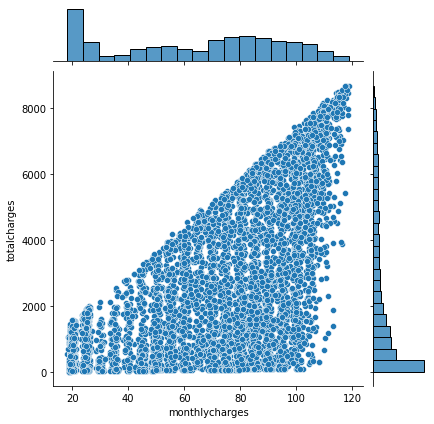

In [22]:
# Visualizamos relación entre 'monthlycharges' y totalcharges
sns.jointplot(x= 'monthlycharges',y= 'totalcharges',data= logistic)

In [23]:
# Del gráfico anterior vemos que para imputar los valores faltantes en 'totalcharges'
# podemos tomar la siguiente relación: 'totalcharges'/'monthlycharges'
mean_value= (logistic['totalcharges']/logistic['monthlycharges']).median()
factor= mean_value*logistic['monthlycharges']
factor.loc[:2] # Visualizamos los primeros dos valores de nuestro resultado

0     860.63
1   1,641.97
2   1,552.59
Name: monthlycharges, dtype: float64

In [24]:
# Imputamos valores nulos de acuerdo al factor anterior
logistic['totalcharges']= factor.where(logistic['totalcharges'] == np.nan, other= logistic['totalcharges'])

In [25]:
# Visualizamos el comportamiento de 'totalcharges' después de imputar valores faltantes
logistic['totalcharges'].describe()

count   7,032.00
mean    2,283.30
std     2,266.77
min        18.80
25%       401.45
50%     1,397.47
75%     3,794.74
max     8,684.80
Name: totalcharges, dtype: float64

In [26]:
logistic.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,"7,043.00","7,043.00","7,043.00","7,032.00"
mean,0.16,32.37,64.76,"2,283.30"
std,0.37,24.56,30.09,"2,266.77"
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,"1,397.47"
75%,0.00,55.00,89.85,"3,794.74"
max,1.00,72.00,118.75,"8,684.80"


# Preparación de los Datos para el Modelo

### Convertir Variables Binarias (Yes-No) a (1-0)

In [27]:
# En este punto ya identificamos aquellas variables con valores Yes/No (binarias) que pueden ser mapeadas de la siguente forma:
    # Yes:1
    # No:0
        # churn, partner, dependents, phoneservice, paperlessbilling

In [28]:
# Definimos la función para mapear 0s y 1s en variables 'bin_var'.
def bin_map(string):
    if string == 'Yes':
        return 1
    else:
        return 0

In [29]:
# Aplicamos la función 'bin_map' a cada variable contenida en 'bin_var'
logistic['churn']= logistic['churn'].apply(lambda row: bin_map(row))
logistic['partner']= logistic['partner'].apply(lambda row: bin_map(row))
logistic['dependents']= logistic['dependents'].apply(lambda row: bin_map(row))
logistic['phoneservice']= logistic['phoneservice'].apply(lambda row: bin_map(row))
logistic['paperlessbilling']= logistic['paperlessbilling'].apply(lambda row: bin_map(row))

In [30]:
# Visualizamos primeros registros del dataset y confirmamos aplicación de los cambios
print(logistic.shape)
logistic.head(3)

(7043, 24)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,bin_tenure,bin_monthlycharges,bin_totalcharges
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,"(-0.1, 2.0]","(25.0, 45.8]","(18.7, 84.6]"
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,"1,889.50",0,"(29.0, 40.0]","(45.8, 58.8]","(1397.5, 2049.0]"
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,"(-0.1, 2.0]","(45.8, 58.8]","(84.6, 267.1]"


### Crear Variables Dummy para el resto de Variables

In [31]:
logistic= pd.get_dummies(data= logistic,columns= ['contract','paymentmethod','gender','internetservice','multiplelines','onlinesecurity','onlinebackup',
                                          'deviceprotection','techsupport','streamingtv','streamingmovies'])
print(logistic.shape)
logistic.head(3)

(7043, 46)


,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,bin_tenure,bin_monthlycharges,bin_totalcharges,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,"(-0.1, 2.0]","(25.0, 45.8]","(18.7, 84.6]",1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,"1,889.50",0,"(29.0, 40.0]","(45.8, 58.8]","(1397.5, 2049.0]",0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,"(-0.1, 2.0]","(45.8, 58.8]","(84.6, 267.1]",1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


In [32]:
logistic.columns

Index(['customerid', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'churn', 'bin_tenure', 'bin_monthlycharges', 'bin_totalcharges',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'gender_Female', 'gender_Male', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'onlinesecurity_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No',
       'techsupport_No internet s

In [33]:
# Verificamos la existencia de columnas duplicadas
logistic.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### Revisar de Outliers - Variables Continuas

In [34]:
# Revisión de outliers
continuous_var= logistic[['tenure','monthlycharges','totalcharges']]
continuous_var.describe(percentiles= [.10, .25, .5, .90, .95, .99])

,tenure,monthlycharges,totalcharges
count,"7,043.00","7,043.00","7,032.00"
mean,32.37,64.76,"2,283.30"
std,24.56,30.09,"2,266.77"
min,0.00,18.25,18.80
10%,2.00,20.05,84.60
25%,9.00,35.50,401.45
50%,29.00,70.35,"1,397.47"
90%,69.00,102.60,"5,976.64"
95%,72.00,107.40,"6,923.59"
99%,72.00,114.73,"8,039.88"


### Revisar Missing Values

In [35]:
logistic.isnull().sum()

customerid                                  0
seniorcitizen                               0
partner                                     0
dependents                                  0
tenure                                      0
phoneservice                                0
paperlessbilling                            0
monthlycharges                              0
totalcharges                               11
churn                                       0
bin_tenure                                  0
bin_monthlycharges                          0
bin_totalcharges                           11
contract_Month-to-month                     0
contract_One year                           0
contract_Two year                           0
paymentmethod_Bank transfer (automatic)     0
paymentmethod_Credit card (automatic)       0
paymentmethod_Electronic check              0
paymentmethod_Mailed check                  0
gender_Female                               0
gender_Male                       

In [36]:
# Obtenemos el porcentaje que representan los missing values dentro del dataset
round(100*(logistic.isnull().sum()/len(logistic.index)), 2) # Tenemos que los 11 valores arrojados arriba representan el 0.16%

customerid                                0.00
seniorcitizen                             0.00
partner                                   0.00
dependents                                0.00
tenure                                    0.00
phoneservice                              0.00
paperlessbilling                          0.00
monthlycharges                            0.00
totalcharges                              0.16
churn                                     0.00
bin_tenure                                0.00
bin_monthlycharges                        0.00
bin_totalcharges                          0.16
contract_Month-to-month                   0.00
contract_One year                         0.00
contract_Two year                         0.00
paymentmethod_Bank transfer (automatic)   0.00
paymentmethod_Credit card (automatic)     0.00
paymentmethod_Electronic check            0.00
paymentmethod_Mailed check                0.00
gender_Female                             0.00
gender_Male  

In [37]:
# De los resultados obtenidos antes para total de missing values en 'totalcharges'
    # Removemos filas con NaN values
logistic= logistic[~np.isnan(logistic['totalcharges'])]
print(logistic.shape)
logistic.head(3)

(7032, 46)


,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,bin_tenure,bin_monthlycharges,bin_totalcharges,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,"(-0.1, 2.0]","(25.0, 45.8]","(18.7, 84.6]",1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,"1,889.50",0,"(29.0, 40.0]","(45.8, 58.8]","(1397.5, 2049.0]",0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,"(-0.1, 2.0]","(45.8, 58.8]","(84.6, 267.1]",1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0


In [38]:
# Revisamos que los cambios fueron aplicados correctamente
round(100*(logistic.isnull().sum()/len(logistic.index)), 2)

customerid                                0.00
seniorcitizen                             0.00
partner                                   0.00
dependents                                0.00
tenure                                    0.00
phoneservice                              0.00
paperlessbilling                          0.00
monthlycharges                            0.00
totalcharges                              0.00
churn                                     0.00
bin_tenure                                0.00
bin_monthlycharges                        0.00
bin_totalcharges                          0.00
contract_Month-to-month                   0.00
contract_One year                         0.00
contract_Two year                         0.00
paymentmethod_Bank transfer (automatic)   0.00
paymentmethod_Credit card (automatic)     0.00
paymentmethod_Electronic check            0.00
paymentmethod_Mailed check                0.00
gender_Female                             0.00
gender_Male  

### Identificar Correlaciones

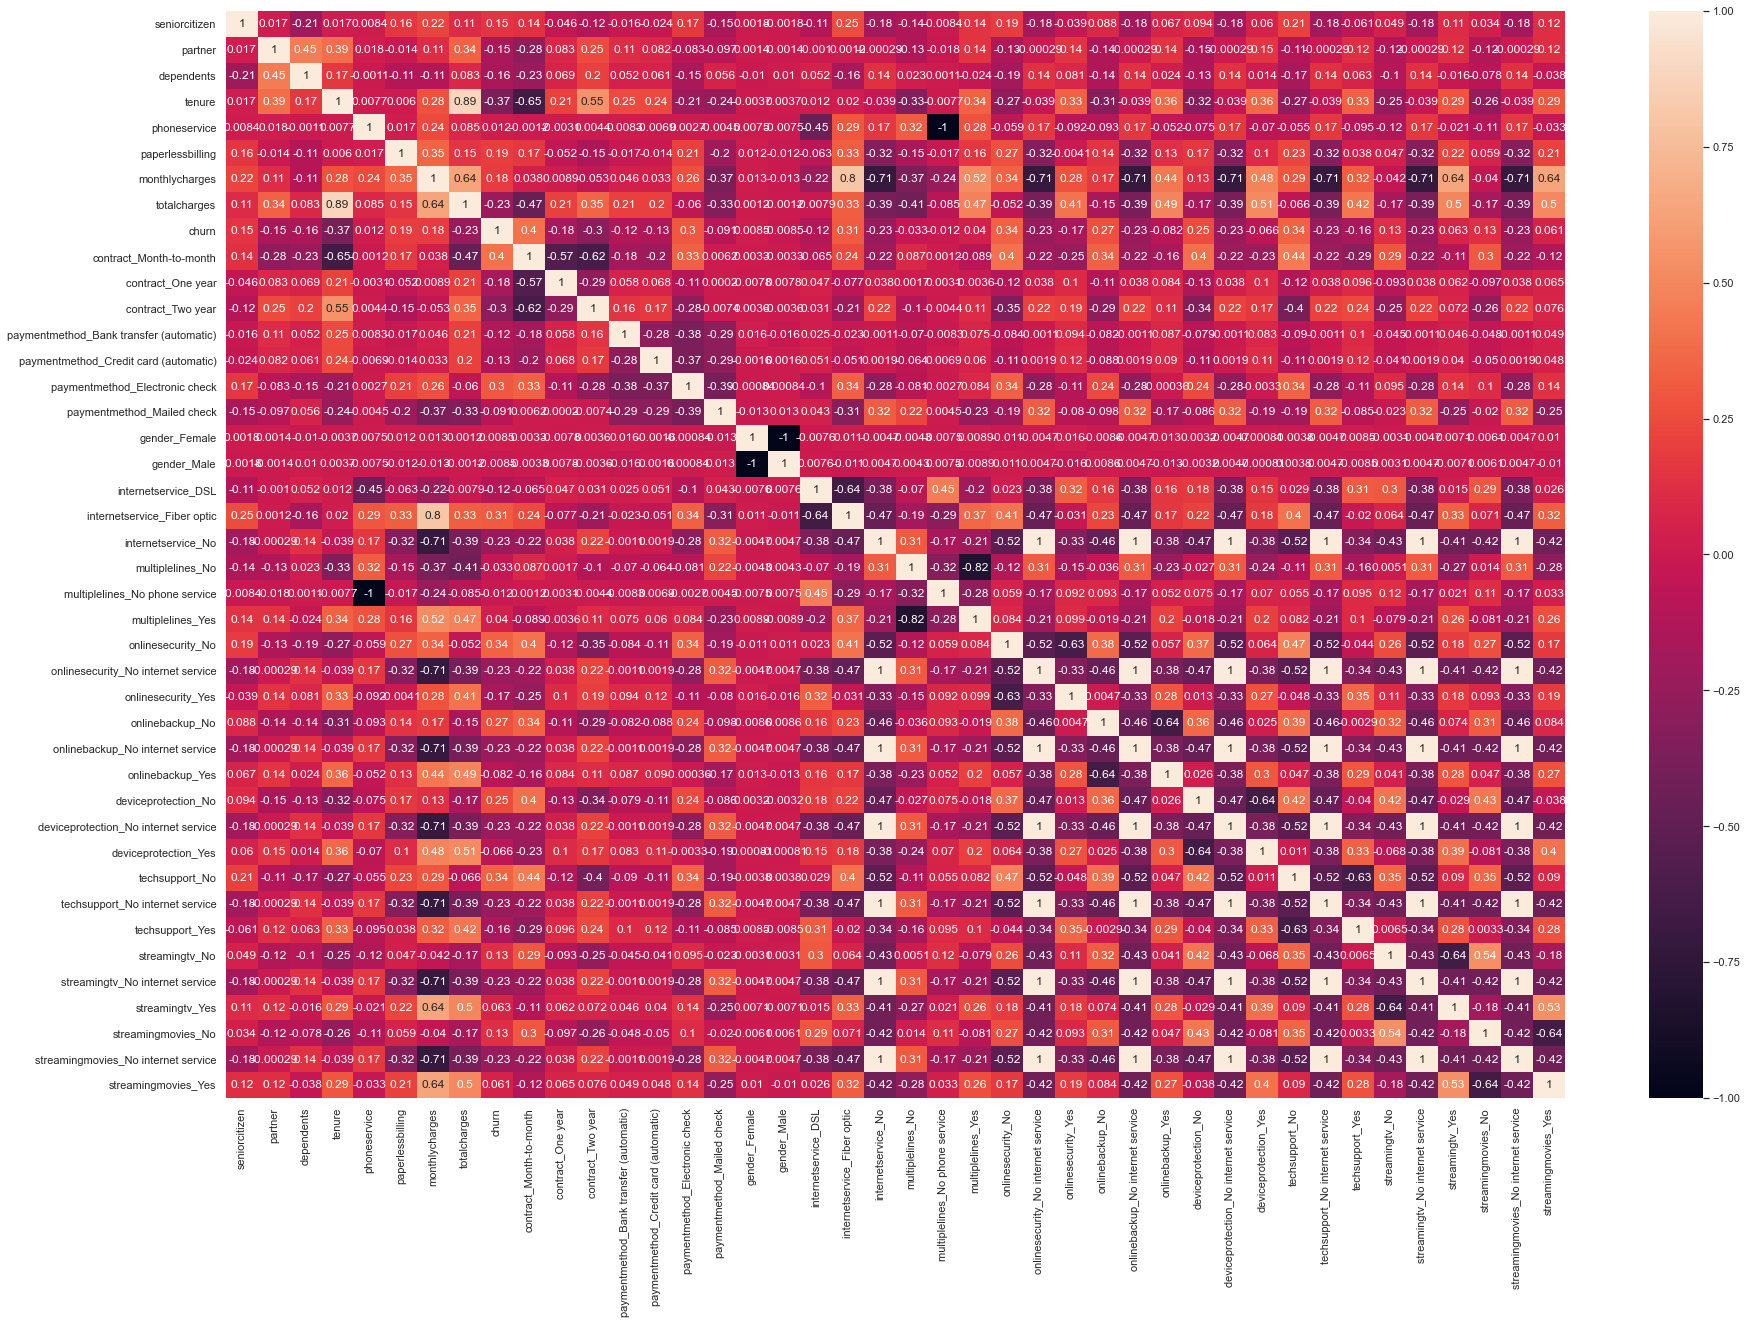

In [39]:
# Ploteamos con un 'heatmap' la matriz de correlación entre variables
sns.set(font_scale=1) 
plt.figure(figsize= (30,20))

sns.heatmap(logistic.corr(method= 'spearman'), annot= True)
plt.show()

In [40]:
correlation = logistic.corr()
c1 = correlation.abs().unstack()

c1.sort_values(ascending = False)

gender_Male                     gender_Female                    1.00
gender_Female                   gender_Male                      1.00
phoneservice                    multiplelines_No phone service   1.00
multiplelines_No phone service  phoneservice                     1.00
seniorcitizen                   seniorcitizen                    1.00
                                                                 ... 
contract_One year               paymentmethod_Mailed check       0.00
totalcharges                    gender_Male                      0.00
gender_Male                     totalcharges                     0.00
gender_Female                   totalcharges                     0.00
totalcharges                    gender_Female                    0.00
Length: 1764, dtype: float64

<AxesSubplot:>

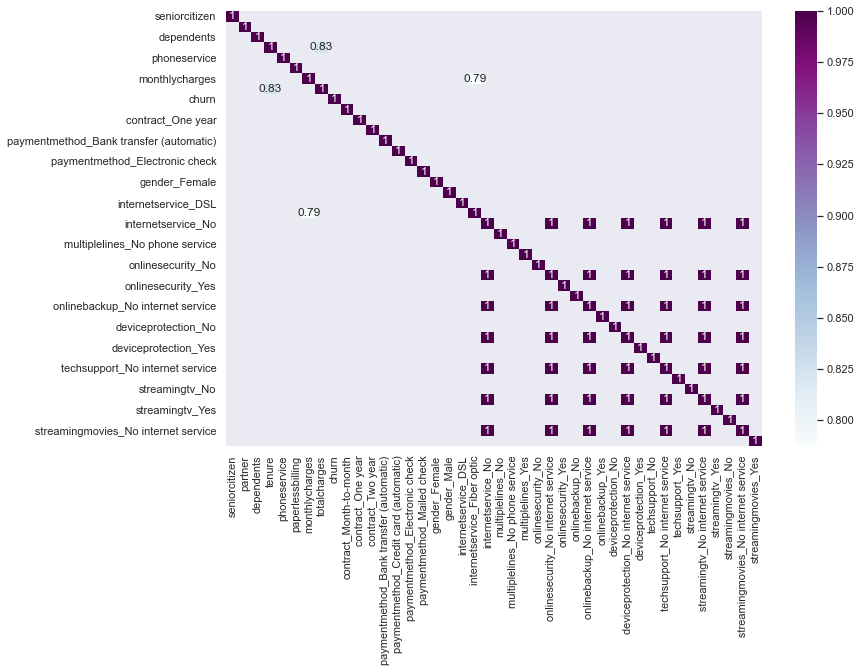

In [41]:
# Visualizamos únicamente aquellas variables que presentan un valor de correlación mayor a 0.7
correlation= logistic.corr()

kot= correlation[correlation>=.7]
plt.figure(figsize= (12,8))
sns.heatmap(kot, cmap= 'BuPu', annot= True)

### Eliminar Variables con Alta Correlación

In [42]:
logistic.columns

Index(['customerid', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'churn', 'bin_tenure', 'bin_monthlycharges', 'bin_totalcharges',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'gender_Female', 'gender_Male', 'internetservice_DSL',
       'internetservice_Fiber optic', 'internetservice_No', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'onlinesecurity_No', 'onlinesecurity_No internet service',
       'onlinesecurity_Yes', 'onlinebackup_No',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No', 'deviceprotection_No internet service',
       'deviceprotection_Yes', 'techsupport_No',
       'techsupport_No internet s

In [43]:
logistic= logistic.drop(['internetservice_No','onlinesecurity_No internet service','onlinebackup_No internet service','deviceprotection_No internet service',
                    'techsupport_No internet service','streamingtv_No internet service', 'streamingmovies_No internet service'], axis= 1)

### Validar Correlación entre Variables - Aplicación de Cambios

<AxesSubplot:>

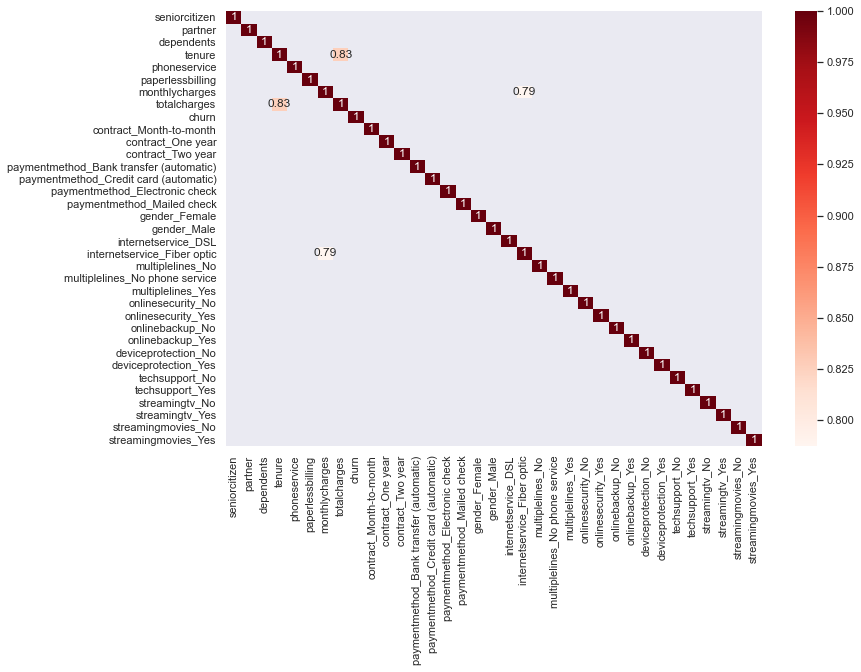

In [44]:
# Visualizamos únicamente aquellas variables que presentan un valor de correlación mayor/igual a 0.7 en 'X_test'
correlation= logistic.corr()

kot= correlation[correlation>=.7]
plt.figure(figsize= (12,8))
sns.heatmap(kot, cmap= 'Reds', annot= True)

# Construir el Modelo

In [45]:
# Definimos nuestra 'X' y 'y', tomando en cuenta que de la 'X' es necesario eliminar las variables
# que se crearon durante la ingeniería de variables para analizar la relación 'Target' VS 'Continuas' y 'Discretas'
y= logistic['churn'].values
X= logistic.drop(columns= ['churn','customerid','bin_tenure','bin_monthlycharges','bin_totalcharges'])

In [46]:
# Escalamos todas las variables dentro del rango 0-1
from sklearn.preprocessing import MinMaxScaler
descriptors= X.columns.values
scaler= MinMaxScaler(feature_range= (0,1))
scaler.fit(X)
X= pd.DataFrame(scaler.transform(X))
X.columns= descriptors

In [47]:
# Obtenemos nuestro 'training set' y 'test set'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 207)

In [48]:
# Importamos la 'regresión logística' de modelos lineales
from sklearn.linear_model import LogisticRegression

In [49]:
# Instanciamos regresión logística, definimos el solver y el tipo de penalización a utilizar
logistic= LogisticRegression(solver= 'liblinear', penalty= 'l1')

In [50]:
# Ajustamos el modelo con nuestros datos de entrenamiento
logistic.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [51]:
# Realizamos la predicción utilizando el conjunto de prueba
logistic.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [52]:
y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [53]:
y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
# Importamos métricas para evaluar el desempeño del modelo
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [55]:
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [56]:
metricas(logistic,X_test,y_test)

 Roc Validate: 0.837
 Acc Validate: 0.806
 Matrix Conf Validate:  
 [[1380  155]
 [ 254  321]]


In [57]:
from sklearn.metrics import f1_score

In [58]:
f1_score(y_pred= logistic.predict(X_test),y_true=y_test)

0.6108468125594672

In [59]:
f1_score(y_pred= logistic.predict(X_test), y_true= y_test, pos_label=0)

0.8709372041653517

In [60]:
from sklearn.metrics import roc_curve

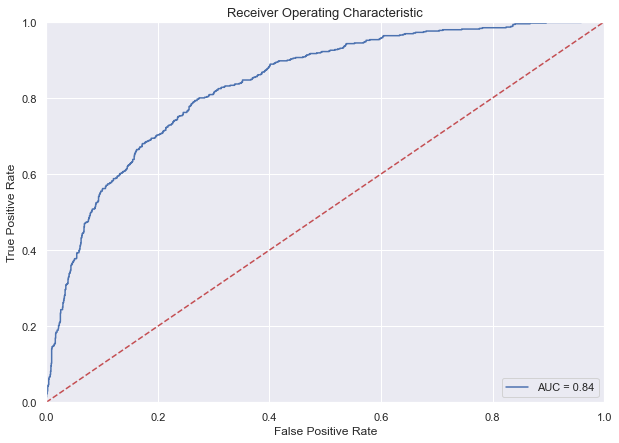

In [61]:
# Graficamos la curva ROC para visualizar el desempeño del modelo
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.titlesize'] = 13

fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Caso I: **Linear Regression**

## Justificación

* La variable seleccionada para este análisis es: 'totalcharges'.

* Durante el análisis de ‘churn’, vimos el escenario en donde un cliente con tipo de contrato ‘mes-a-mes’, ‘facturación electrónica’, y ‘tenencia’ con valores de 0-12 representa un mayor riesgo de dejar la compañía.

* También durante el EDA se observó que dentro de las principales variables que mejor describen el aumento en la probabilidad de churn son: tipo de contrato, forma de pago, cargo mensual y si se trata de una persona mayor o no. Además de estás variables, para efectos del análisis se toman en cuenta: tenencia, género y la variable objetivo cargos totales.

* Sin embargo, otra observación importante de mencionar que la variable de estudio también podría ser el 'cargo mensual' para efectos de identificar con mayor detalle aquellos que se encuentran en este grupo, ya que como parte del análisis previo se identificó que éstos tienen mayor potencial para dejar la compañía.(***)

In [62]:
print(linear.shape)
linear.columns = [x.lower() for x in linear.columns]
linear.head(3)

(7043, 21)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [63]:
linear.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [64]:
linear.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

<AxesSubplot:>

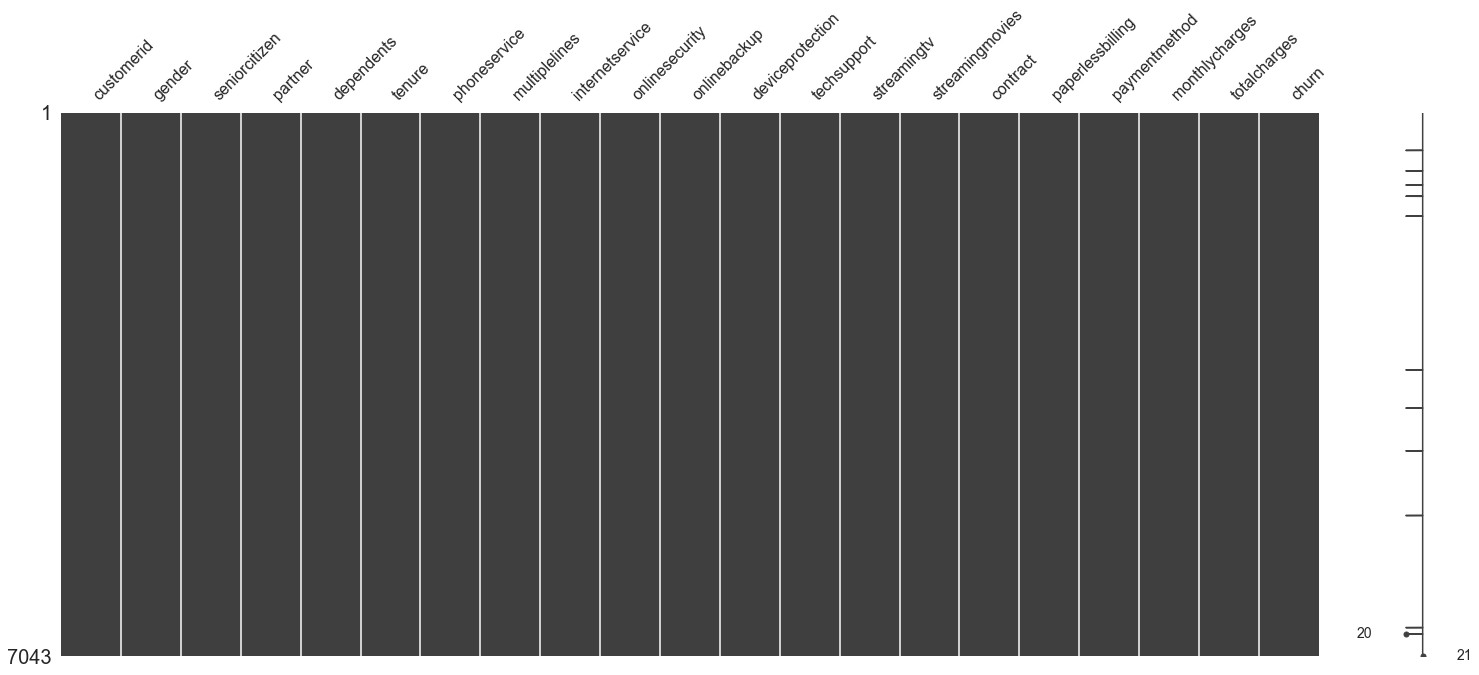

In [65]:
# Visualizamos valores faltantes
msno.matrix(linear)

In [66]:
linear.describe(np.arange(.1,1,.1))

,seniorcitizen,tenure,monthlycharges
count,"7,043.00","7,043.00","7,043.00"
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
10%,0.00,2.00,20.05
20%,0.00,6.00,25.05
30%,0.00,12.00,45.85
40%,0.00,20.00,58.83
50%,0.00,29.00,70.35
60%,0.00,40.00,79.10


In [67]:
# Dado que 'totalcharges' no es mostrado antes, analizamos su comportamiento
linear['totalcharges'].describe()

count     7032
unique    6530
top       20.2
freq        11
Name: totalcharges, dtype: object

In [68]:
# Reemplazamos valores nulos y convertimos 'totalcharges' a numérica para aplicar 'describe'
linear['totalcharges'] = linear['totalcharges'].replace(' ', np.nan)
linear['totalcharges'] = pd.to_numeric(linear['totalcharges'])

In [69]:
# Verificamos los cambios aplicados a 'totalcharges'
linear['totalcharges'].describe()

count   7,032.00
mean    2,283.30
std     2,266.77
min        18.80
25%       401.45
50%     1,397.47
75%     3,794.74
max     8,684.80
Name: totalcharges, dtype: float64

In [70]:
linear.describe(np.arange(.1,1,.1))

,seniorcitizen,tenure,monthlycharges,totalcharges
count,"7,043.00","7,043.00","7,043.00","7,032.00"
mean,0.16,32.37,64.76,"2,283.30"
std,0.37,24.56,30.09,"2,266.77"
min,0.00,0.00,18.25,18.80
10%,0.00,2.00,20.05,84.60
20%,0.00,6.00,25.05,267.07
30%,0.00,12.00,45.85,552.00
40%,0.00,20.00,58.83,944.17
50%,0.00,29.00,70.35,"1,397.47"
60%,0.00,40.00,79.10,"2,048.95"


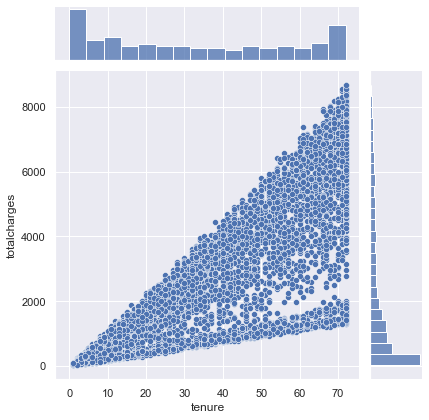

In [71]:
sns.jointplot(x= 'tenure', y= 'totalcharges', data= linear)

## Justificación

## Dataframe para Regresión Lineal

In [72]:
linear= linear[['customerid','contract','paymentmethod','monthlycharges','seniorcitizen','tenure','gender','totalcharges']]

## Eliminar Missing Values

In [73]:
# De los resultados obtenidos antes para total de missing values en 'totalcharges'
    # Removemos filas con NaN values
linear= linear[~np.isnan(linear['totalcharges'])]
print(linear.shape)
linear.head(3)

(7032, 8)


,customerid,contract,paymentmethod,monthlycharges,seniorcitizen,tenure,gender,totalcharges
0,7590-VHVEG,Month-to-month,Electronic check,29.85,0,1,Female,29.85
1,5575-GNVDE,One year,Mailed check,56.95,0,34,Male,"1,889.50"
2,3668-QPYBK,Month-to-month,Mailed check,53.85,0,2,Male,108.15


In [74]:
# Creamos variables dummies para las categóricas
data= linear[['contract','paymentmethod']]
linear_dummies= pd.get_dummies(data)

In [75]:
linear_dummies

,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0
4,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
7038,0,1,0,0,0,0,1
7039,0,1,0,0,1,0,0
7040,1,0,0,0,0,1,0
7041,1,0,0,0,0,0,1


In [76]:
linear['gender']= linear['gender'].map(lambda x: 1 if x=='Female' else 0)

In [77]:
linear

,customerid,contract,paymentmethod,monthlycharges,seniorcitizen,tenure,gender,totalcharges
0,7590-VHVEG,Month-to-month,Electronic check,29.85,0,1,1,29.85
1,5575-GNVDE,One year,Mailed check,56.95,0,34,0,"1,889.50"
2,3668-QPYBK,Month-to-month,Mailed check,53.85,0,2,0,108.15
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,0,45,0,"1,840.75"
4,9237-HQITU,Month-to-month,Electronic check,70.70,0,2,1,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Mailed check,84.80,0,24,0,"1,990.50"
7039,2234-XADUH,One year,Credit card (automatic),103.20,0,72,1,"7,362.90"
7040,4801-JZAZL,Month-to-month,Electronic check,29.60,0,11,1,346.45
7041,8361-LTMKD,Month-to-month,Mailed check,74.40,1,4,0,306.60


In [78]:
linear= pd.concat([linear,linear_dummies], axis= 1)

In [79]:
linear

,customerid,contract,paymentmethod,monthlycharges,seniorcitizen,tenure,gender,totalcharges,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,7590-VHVEG,Month-to-month,Electronic check,29.85,0,1,1,29.85,1,0,0,0,0,1,0
1,5575-GNVDE,One year,Mailed check,56.95,0,34,0,"1,889.50",0,1,0,0,0,0,1
2,3668-QPYBK,Month-to-month,Mailed check,53.85,0,2,0,108.15,1,0,0,0,0,0,1
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,0,45,0,"1,840.75",0,1,0,1,0,0,0
4,9237-HQITU,Month-to-month,Electronic check,70.70,0,2,1,151.65,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Mailed check,84.80,0,24,0,"1,990.50",0,1,0,0,0,0,1
7039,2234-XADUH,One year,Credit card (automatic),103.20,0,72,1,"7,362.90",0,1,0,0,1,0,0
7040,4801-JZAZL,Month-to-month,Electronic check,29.60,0,11,1,346.45,1,0,0,0,0,1,0
7041,8361-LTMKD,Month-to-month,Mailed check,74.40,1,4,0,306.60,1,0,0,0,0,0,1


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
target= 'totalcharges'

In [82]:
descriptors= [col for col in linear.columns if col not in [target,'contract','paymentmethod','customerid']]

In [83]:
descriptors

['monthlycharges',
 'seniorcitizen',
 'tenure',
 'gender',
 'contract_Month-to-month',
 'contract_One year',
 'contract_Two year',
 'paymentmethod_Bank transfer (automatic)',
 'paymentmethod_Credit card (automatic)',
 'paymentmethod_Electronic check',
 'paymentmethod_Mailed check']

In [84]:
linear= linear[descriptors + [target]].copy()

In [85]:
linear

,monthlycharges,seniorcitizen,tenure,gender,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,totalcharges
0,29.85,0,1,1,1,0,0,0,0,1,0,29.85
1,56.95,0,34,0,0,1,0,0,0,0,1,"1,889.50"
2,53.85,0,2,0,1,0,0,0,0,0,1,108.15
3,42.30,0,45,0,0,1,0,1,0,0,0,"1,840.75"
4,70.70,0,2,1,1,0,0,0,0,1,0,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,24,0,0,1,0,0,0,0,1,"1,990.50"
7039,103.20,0,72,1,0,1,0,0,1,0,0,"7,362.90"
7040,29.60,0,11,1,1,0,0,0,0,1,0,346.45
7041,74.40,1,4,0,1,0,0,0,0,0,1,306.60


In [86]:
X= linear[descriptors]
y= linear[[target]]

In [87]:
X

,monthlycharges,seniorcitizen,tenure,gender,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,29.85,0,1,1,1,0,0,0,0,1,0
1,56.95,0,34,0,0,1,0,0,0,0,1
2,53.85,0,2,0,1,0,0,0,0,0,1
3,42.30,0,45,0,0,1,0,1,0,0,0
4,70.70,0,2,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,0,24,0,0,1,0,0,0,0,1
7039,103.20,0,72,1,0,1,0,0,1,0,0
7040,29.60,0,11,1,1,0,0,0,0,1,0
7041,74.40,1,4,0,1,0,0,0,0,0,1


In [88]:
y

,totalcharges
0,29.85
1,"1,889.50"
2,108.15
3,"1,840.75"
4,151.65
...,...
7038,"1,990.50"
7039,"7,362.90"
7040,346.45
7041,306.60


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [90]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [91]:
X_scal= StandardScaler()

X_train_std= X_scal.fit_transform(X_train)

X_test_std= X_scal.transform(X_test)

In [92]:
X_train_std

array([[ 1.45297143, -0.44041147,  1.6100881 , ...,  1.90324777,
        -0.71483128, -0.54301374],
       [-0.00328869, -0.44041147, -0.62675951, ..., -0.52541766,
        -0.71483128,  1.84157402],
       [-0.336529  , -0.44041147, -0.42340972, ..., -0.52541766,
        -0.71483128,  1.84157402],
       ...,
       [ 1.37132755, -0.44041147,  0.71534906, ...,  1.90324777,
        -0.71483128, -0.54301374],
       [ 0.52156478, -0.44041147, -0.74876938, ...,  1.90324777,
        -0.71483128, -0.54301374],
       [ 1.32800631, -0.44041147,  1.28472845, ...,  1.90324777,
        -0.71483128, -0.54301374]])

In [93]:
X_test_std

array([[-1.47121222, -0.44041147, -1.27747881, ..., -0.52541766,
         1.3989315 , -0.54301374],
       [-1.47287843, -0.44041147, -0.66742946, ...,  1.90324777,
        -0.71483128, -0.54301374],
       [-1.49953765, -0.44041147, -1.27747881, ...,  1.90324777,
        -0.71483128, -0.54301374],
       ...,
       [ 0.30162618,  2.27060389,  0.47132932, ..., -0.52541766,
         1.3989315 , -0.54301374],
       [-1.50786866, -0.44041147,  1.28472845, ..., -0.52541766,
        -0.71483128,  1.84157402],
       [-0.81972743, -0.44041147,  0.18663962, ...,  1.90324777,
        -0.71483128, -0.54301374]])

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
linear_reg= LinearRegression()

In [96]:
linear_reg.fit(X_train_std,y_train)

LinearRegression()

In [97]:
y_test

,totalcharges
5561,20.65
5814,330.25
2645,19.80
3983,24.25
6438,74.40
...,...
6359,"4,238.45"
1091,"2,243.90"
1427,"3,122.40"
1288,"1,240.15"


In [98]:
s= pd.DataFrame(linear_reg.predict(X_test_std))
s.head(10)

,0
0,"-1,603.09"
1,-445.09
2,"-1,463.09"
3,"-1,466.09"
4,392.91
5,178.91
6,"2,634.91"
7,246.91
8,"-1,253.09"
9,"5,046.91"


In [99]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [100]:
def metricas(y_true,y_pred):
    r2= r2_score(y_true, y_pred)
    mae= mean_absolute_error(y_true, y_pred)
    mse= mean_squared_error(y_true, y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [101]:
metricas(y_test,linear_reg.predict(X_test_std))

El r2 score es 0.8940419125591534
El error cuadrático medio es 537922.5704229756
El error medio absoluto es 586.5291361767629


In [102]:
y_test

,totalcharges
5561,20.65
5814,330.25
2645,19.80
3983,24.25
6438,74.40
...,...
6359,"4,238.45"
1091,"2,243.90"
1427,"3,122.40"
1288,"1,240.15"


In [103]:
predictions= y_test.copy()
predictions['lr']= linear_reg.predict(X_test_std)

In [104]:
predictions.reset_index(drop= True, inplace= True)

In [105]:
predictions.head(50)

,totalcharges,lr
0,20.65,"-1,603.09"
1,330.25,-445.09
2,19.80,"-1,463.09"
3,24.25,"-1,466.09"
4,74.40,392.91
5,446.80,178.91
6,"2,220.10","2,634.91"
7,69.60,246.91
8,68.45,"-1,253.09"
9,"5,315.10","5,046.91"


<AxesSubplot:title={'center':'Linear Regression'}>

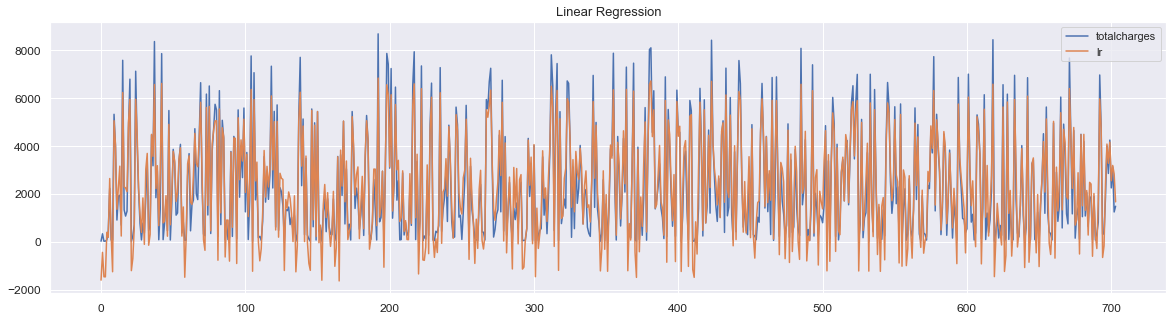

In [106]:
predictions.plot(figsize= (20,5),fontsize= 12,title= 'Linear Regression')

# Caso II: **Lasso**

In [107]:
from sklearn.linear_model import Lasso

In [108]:
lasso= Lasso()

In [109]:
lasso.fit(X_train_std,y_train)

Lasso()

In [110]:
lasso.predict(X_test_std)

array([-1.59721816e+03, -4.65538648e+02, -1.47966689e+03, -1.46031935e+03,
        3.99140513e+02,  1.87064170e+02,  2.64091710e+03,  2.57718137e+02,
       -1.27091748e+03,  5.03621096e+03,  4.03079750e+03,  1.36069621e+03,
        2.23093308e+03,  3.15695110e+03,  2.41371119e+02,  6.23757598e+03,
        2.28263397e+03,  2.23631150e+03,  2.09818979e+03,  4.97099281e+03,
        5.92295006e+03, -1.21915576e+03, -7.07252551e+02,  5.45983360e+02,
        5.92936395e+03,  4.50342883e+03,  2.24310581e+03,  1.11709053e+03,
        3.95337768e+02,  1.82300601e+03, -1.00049681e+02,  3.03346021e+03,
        3.66219456e+03, -1.58428861e+02,  3.13744702e+02,  4.46758637e+03,
        3.56055293e+03,  6.58456070e+03,  2.20847661e+03,  3.15256013e+03,
        6.80625994e+02,  2.89216040e+03,  6.61076092e+03,  7.97625541e+02,
        8.45160833e+02,  1.90773576e+03,  2.05441003e+02,  4.89442879e+03,
        6.97427643e+02,  1.97715755e+03,  3.77125756e+03,  3.37215009e+03,
        1.67052064e+03,  

In [111]:
metricas(y_test,lasso.predict(X_test_std))

El r2 score es 0.8940748164214757
El error cuadrático medio es 537755.5257865089
El error medio absoluto es 586.2432813381228


In [112]:
lasso.n_features_in_

11

In [113]:
lasso.coef_

array([1141.14193755,  -17.5641475 , 1601.83596374,   -3.25363209,
         -0.        ,   45.0324949 ,  -13.09550077,  -15.57428041,
          0.        ,  -73.98271212,   99.3427409 ])

In [114]:
predictions['lasso']=lasso.predict(X_test_std)

<AxesSubplot:title={'center':'Lasso Regression'}>

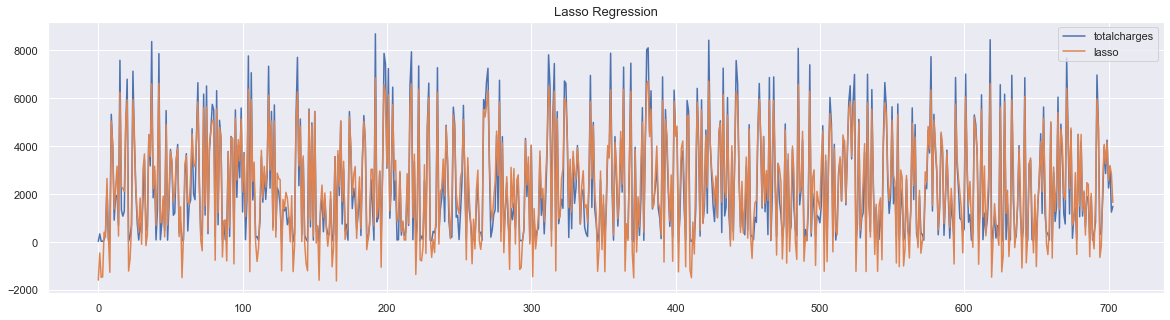

In [115]:
predictions[['totalcharges','lasso']].plot(figsize= (20,5), title= 'Lasso Regression')

# Caso III: **Ridge**

In [116]:
from sklearn.linear_model import Ridge

In [117]:
ridge= Ridge()

In [118]:
ridge.fit(X_train_std,y_train)

Ridge()

In [119]:
ridge.predict(X_test_std)

array([[-1600.39000472],
       [ -463.75047691],
       [-1481.17861082],
       [-1463.35637613],
       [  394.63399909],
       [  183.8851905 ],
       [ 2638.24130627],
       [  254.43788743],
       [-1272.15041516],
       [ 5040.44081649],
       [ 4037.55049559],
       [ 1359.92711439],
       [ 2230.13295539],
       [ 3153.78911538],
       [  236.06184481],
       [ 6237.37449534],
       [ 2282.02658945],
       [ 2238.67884345],
       [ 2091.73277724],
       [ 4974.3159908 ],
       [ 5930.24147026],
       [-1217.31473395],
       [ -712.50395194],
       [  547.14983892],
       [ 5929.62813559],
       [ 4503.3906244 ],
       [ 2246.09000851],
       [ 1114.6457553 ],
       [  390.8275094 ],
       [ 1821.16021538],
       [ -102.74541926],
       [ 3028.1927005 ],
       [ 3667.93917424],
       [ -161.95744806],
       [  309.61898219],
       [ 4464.93581056],
       [ 3559.31772177],
       [ 6583.16570205],
       [ 2207.44974168],
       [ 3156.56197777],


In [120]:
metricas(y_test,ridge.predict(X_test_std))

El r2 score es 0.8940304391941787
El error cuadrático medio es 537980.8178123697
El error medio absoluto es 586.3729601221135


In [121]:
predictions['ridge']=ridge.predict(X_test_std)

<AxesSubplot:title={'center':'Ridge Regression'}>

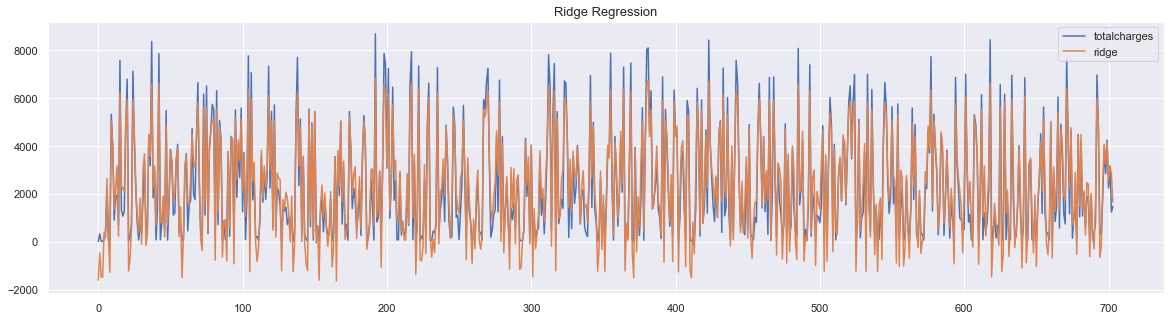

In [122]:
predictions[['totalcharges','ridge']].plot(figsize= (20,5), title= 'Ridge Regression')

# Caso IV: **Elastic Net**

In [123]:
from sklearn.linear_model import ElasticNet

In [124]:
elastic= ElasticNet(alpha=.7)

In [125]:
elastic.fit(X_train_std,y_train)

ElasticNet(alpha=0.7)

In [126]:
elastic.predict(X_test_std)

array([-7.36787111e+02,  9.00278400e+01, -5.75442311e+02, -6.28544643e+02,
        9.90469136e+02,  6.04097714e+02,  2.98700225e+03,  7.25596032e+02,
       -4.38518233e+02,  4.16505643e+03,  3.43889009e+03,  1.60253439e+03,
        2.07948946e+03,  3.17768784e+03,  1.26510198e+03,  5.64158972e+03,
        2.59268122e+03,  2.27830229e+03,  2.45817487e+03,  4.25082733e+03,
        4.69629208e+03, -7.85784637e+02,  4.24921021e+02,  7.63652696e+02,
        4.86574639e+03,  4.22244787e+03,  2.04926725e+03,  1.48845246e+03,
        9.87462401e+02,  1.99523846e+03,  6.35084845e+02,  3.09453066e+03,
        3.47460055e+03,  3.25428339e+02,  9.20487983e+02,  4.35590469e+03,
        3.58007861e+03,  5.76714939e+03,  2.13124730e+03,  2.72146862e+03,
        1.06424729e+03,  2.97770074e+03,  6.03856168e+03,  1.30127269e+03,
        1.44098949e+03,  2.30815611e+03,  5.17415533e+02,  4.49261673e+03,
        7.29609914e+02,  1.68907515e+03,  3.28166634e+03,  2.77981153e+03,
        1.34472106e+03,  

In [127]:
metricas(y_test, elastic.predict(X_test_std))

El r2 score es 0.8470570259929616
El error cuadrático medio es 776453.0267869384
El error medio absoluto es 694.6792285453965


In [128]:
predictions['elastic']=elastic.predict(X_test_std)

<AxesSubplot:title={'center':'Elastic Regression'}>

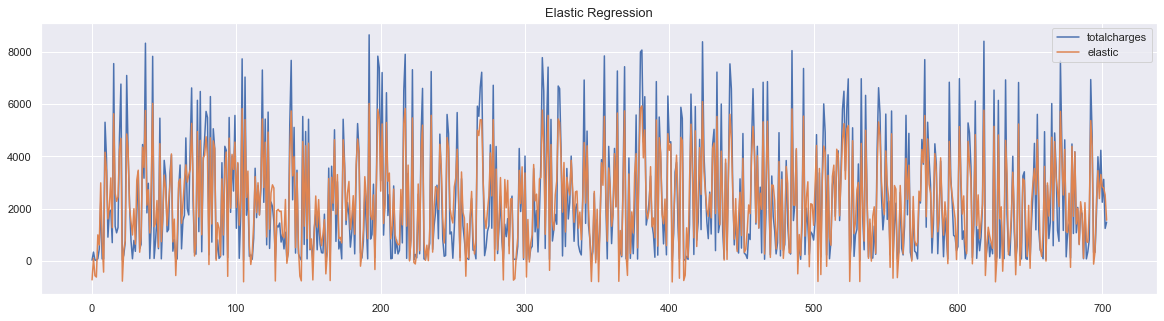

In [129]:
predictions[['totalcharges','elastic']].plot(figsize= (20,5), title= 'Elastic Regression')

## Comparación Desempeño de Modelos

<AxesSubplot:title={'center':'Desempeño Modelos'}>

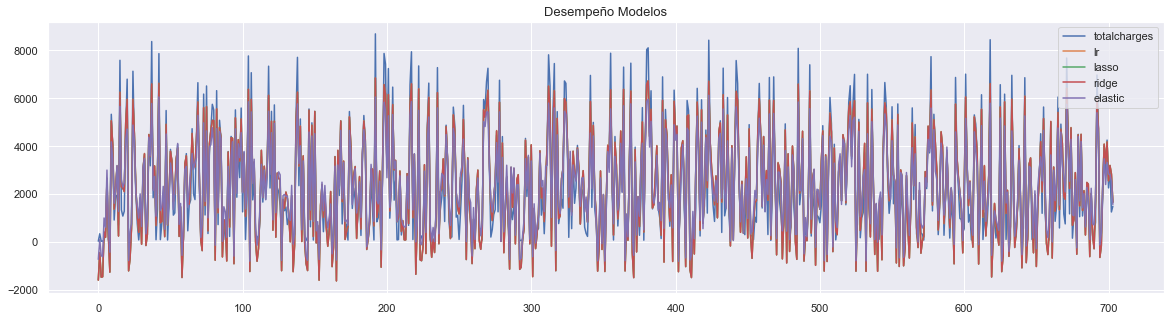

In [130]:
predictions.plot(figsize=(20,5),title="Desempeño Modelos")